In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objs as go
import plotly.io as pio
from datetime import datetime
import random,os,itertools
from sklearn.decomposition import PCA

In [3]:
path = r'C:\Users\karl\Documents\datasets\playground23'
df_train = pd.read_csv(path+"\\train.csv")
df_test = pd.read_csv(path+"\\test.csv")

In [4]:
df_train.dtypes

id                  int64
sudden_fever      float64
headache          float64
mouth_bleed       float64
nose_bleed        float64
                   ...   
ulcers            float64
toenail_loss      float64
speech_problem    float64
bullseye_rash     float64
prognosis          object
Length: 66, dtype: object

In [7]:
df_train.shape

(707, 66)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

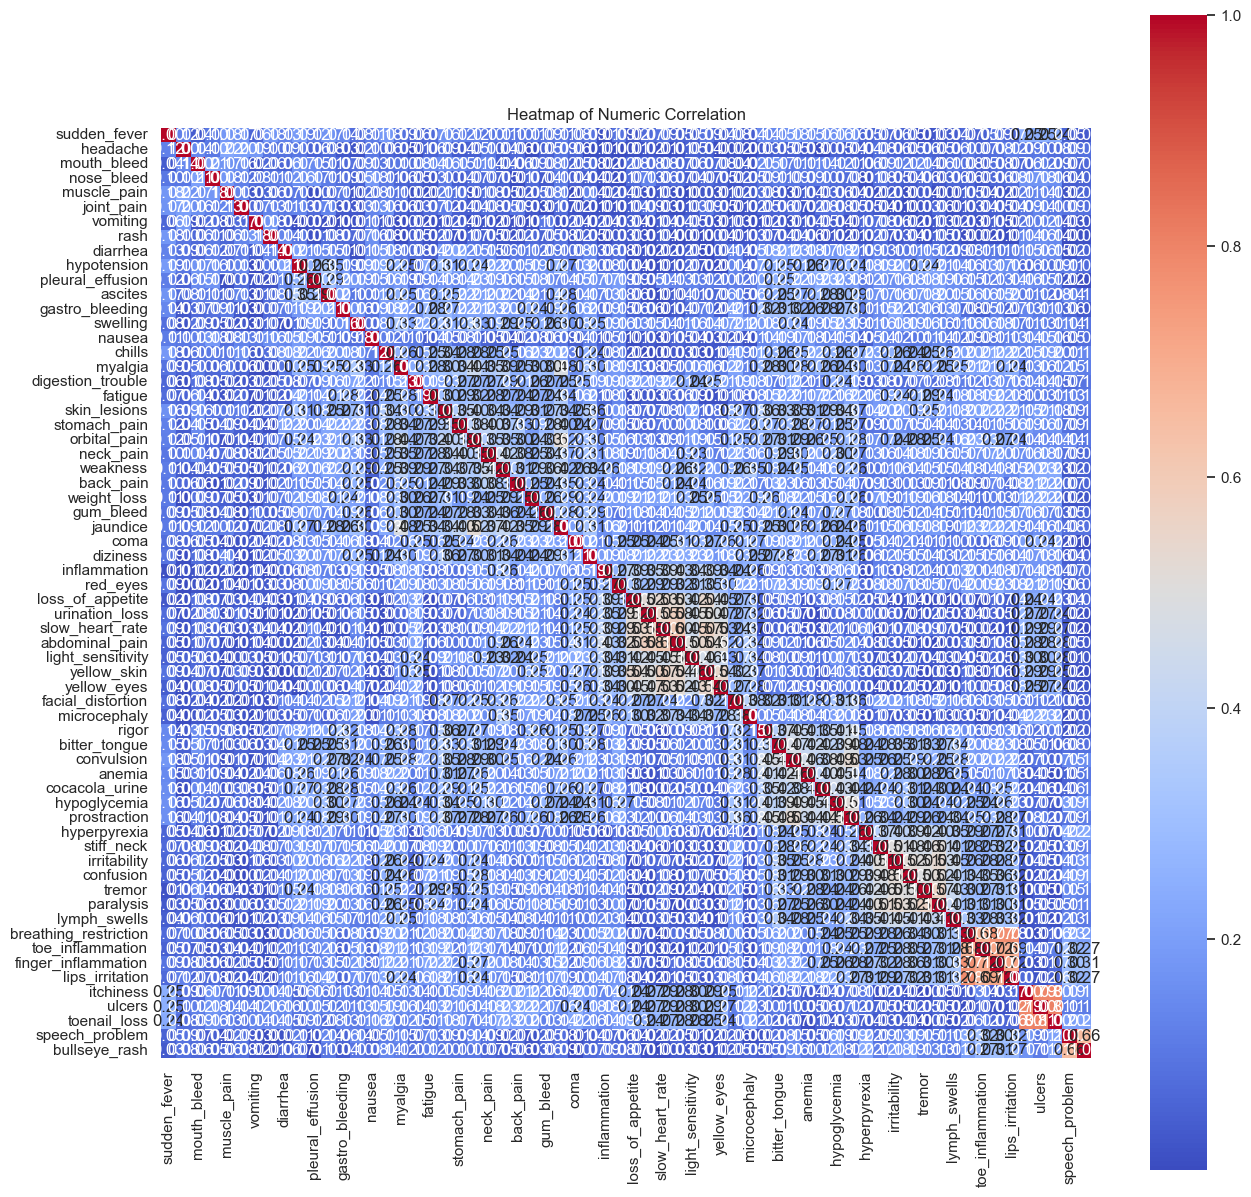

                sudden_fever  headache  mouth_bleed  nose_bleed  muscle_pain  \
sudden_fever        1.000000  0.124397     0.036049    0.097796     0.179499   
headache            0.124397  1.000000     0.141593    0.101380     0.224059   
mouth_bleed         0.036049  0.141593     1.000000    0.206715     0.168994   
nose_bleed          0.097796  0.101380     0.206715    1.000000     0.177816   
muscle_pain         0.179499  0.224059     0.168994    0.177816     1.000000   
...                      ...       ...          ...         ...          ...   
itchiness           0.249787  0.094693     0.063708    0.166040     0.113089   
ulcers              0.252493  0.104211     0.120258    0.175352     0.135370   
toenail_loss        0.237154  0.079576     0.087354    0.159009     0.125176   
speech_problem      0.054514  0.090628     0.070824    0.044286     0.017445   
bullseye_rash       0.031317  0.083588     0.063531    0.053200     0.058868   

                joint_pain  vomiting   

In [40]:
class numeric_corr(object):
    def __init__(self,df_data):
       
        self.df_num_only = df_data.select_dtypes(include=np.number)
    def visu_data(self):
        print(self.data)
        print(self.data.dtypes)
    def corr_numeric(self):
        df_num_only = self.df_num_only.select_dtypes(include=np.number)
        #print(df_num_only)
        df_corr = df_num_only.corr(method='kendall').abs()
        sns.set(font_scale=1)
        plt.figure(figsize=(15, 15))
        sns.heatmap(df_corr, annot=True, cmap='coolwarm', square=True, fmt='.2f')
        plt.title('Heatmap of Numeric Correlation')
        plt.show()
        print(df_corr)
        df_corr_unstack = df_corr.unstack()
        df_corr_top = df_corr_unstack.sort_values(kind="quicksort",ascending=False).reset_index()
        df_corr_top.columns = ["col1","col2","coef"]
        df_corr_top = df_corr_top.loc[df_corr_top["col1"]!=df_corr_top["col2"]]
        print(df_corr_top)
        df_corr_top.coef = df_corr_top.coef.round()
        print(df_corr_top.head(70))
        return df_corr

i_corr_df_train = numeric_corr(df_train.set_index('id'))
df_correl = i_corr_df_train.corr_numeric()
print(df_correl)

In [ ]:
df_correl.to_csv(os.path.join(path,"df_corr.csv"),sep=";")

In [81]:
def reduced_heatmap_corr(df,threshold):
    # Filter correlation coefficients
    df = df.where(np.abs(corr) > threshold)
    # remplacer les valeurs sur la diagonale par NaN
    np.fill_diagonal(df.values, np.nan)
    df.dropna(axis=1,how='all',inplace=True)
    df.dropna(axis=0,how='all',inplace=True)
    # Create heatmap using filtered correlation coefficients
    fig = plt.figure(figsize=(15, 15))
    sns.heatmap(df, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Heatmap of Numeric Correlation (Threshold = {})'.format(threshold))
    plt.show()
    return df

In [48]:
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objs as go
import plotly.io as pio
from datetime import datetime
import random,os,itertools
from sklearn.decomposition import PCA
class reduction_tools(object):
    def __init__(self,meth_choice='pca',df_cible=pd.DataFrame(),Y=pd.DataFrame()):
        self.meth = meth_choice
        self.df_cible = df_cible
        self.labels_series = Y
    def acp(self,b_plot = False):
        
        pca = PCA()
        a_X_pca = pca.fit_transform(self.df_cible)
        print("=============== affichage de a_X_pca ========================")
        print(a_X_pca)
        #convertissons le resultat de l'acp en dataframme et renommer les noms de colonnes de PC1 a PCX
        pca_columns = ["PC"+str(c) for c in range(1,a_X_pca.shape[1]+1,1)]
        X_pca = pd.DataFrame(a_X_pca,index=self.df_cible.index,columns=pca_columns)
        print(X_pca.head(5))
        # variance explique par les composantes
        self.a_explained_variance = pca.explained_variance_ratio_
        explained_variance = pd.Series(dict(zip(X_pca.columns,100*self.a_explained_variance)))
        explained_variance.plot(kind="bar",figsize=(15,4),rot=90,ylabel='variance expliquée (%)')
        if b_plot:
            plt.show()
        return a_X_pca
    def plot_acp_result(self,nb_comp=4,b_3d_plot=True):
        "a rajouter le cercle de correlation"
        if b_3d_plot and nb_comp==3:
            total_var = self.a_explained_variance[:3].sum()*100
            var_pc1 = round(self.a_explained_variance[0]*100,0)
            var_pc2 = round(self.a_explained_variance[1]*100,0)
            var_pc3 = round(self.a_explained_variance[2]*100,0)
            print("total_var:")
            print(total_var)
            if  self.labels_series.empty: 
                fig = px.scatter_3d(
                    self.acp(),
                    x=0,y=1,z=2,
                    title=f'Variance total expliquée par la projection linéaire (ACP): {total_var: .2f}% [PC1({var_pc1}%),PC2({var_pc2}%),PC3({var_pc3}%)]',
                    labels={'0':'PC 1','1':'PC 2','2':'PC 3'}
                
                    )
            else:
                fig = px.scatter_3d(
                    self.acp(),
                    x=0,y=1,z=2,
                    title=f'Variance total expliquée par la projection linéaire (ACP): {total_var: .2f}% [PC1({var_pc1}%),PC2({var_pc2}%),PC3({var_pc3}%)]',
                    labels={'0':'PC 1','1':'PC 2','2':'PC 3'},
                    color = self.labels_series
                
                    )
            plot(fig, auto_open=True,filename="pca_plot_3d.html")
        
        
        else:
            print("pour rappel, pour avoir les 3 PC dans un graphe, nb_comp doit etre à 3!")
            labels = {
                str(i): "PC{} ({})%".format(i+1,round(var,0)) for i, var in enumerate(self.a_explained_variance*100)
                }
            from pprint import pprint
            pprint(labels)
            if not self.labels_series.empty:
                fig = px.scatter_matrix(self.acp(),labels=labels,dimensions=range(nb_comp),color = self.labels_series, title="Projection linéaire (ACP) sur les différentes composantes principales:")
            else:
                fig = px.scatter_matrix(self.acp(),labels=labels,dimensions=range(nb_comp),title="Projection linéaire (ACP) sur les différentes composantes principales:")
            fig.update_traces(diagonal_visible=False)
            plot(fig, auto_open=True,filename="pca_plot_2d.html")
    def Draw_arrow(self,fig,l_X,l_Y,i,label):
        tex_posi = ["top center","top right","middle center","bottom left","middle right"]
        fig.add_trace(go.Scatter(
        x=[l_X[i],0],
        y=[l_Y[i],0],
        mode="lines+markers+text",
        name=str(label[i]),
        text=[str(label[i])],
        textposition=random.choice(tex_posi)
        ))
    def plot_circle(self,l_X,l_Y,label,Xlabel,Ylabel,biplot=True):
        '''
        DESCRIPTION : trace le cercle  avce le choix d avoir le biplot ou pas
        INPUT : -liste des coordonnees de chaque variable
                -label pourcentage inertie
        OUTPUT : retourne fig pour etre utiliser dans la fonction circleofcorrelation
        '''
        trace0 = go.Scatter(
        x= l_X,
        y=l_Y,
        mode = 'markers',
        showlegend=False
        
        )
        
        data = [trace0]
        layout = {
        'xaxis': {
            'range': [-3, 3],
            'zeroline': True,
            'title':Xlabel,    
        },
        'yaxis': {
            'range': [-3, 3],'title':Ylabel,
        },
        'width': 800,
        'height': 800,
        
        'shapes': [
            {
                'type': 'circle',
                'xref': 'x',
                'yref': 'y',
                'x0': -1,
                'y0': -1,
                'x1': 1,
                'y1': 1,
                'line': {
                    'color': 'rgba(250, 171, 96, 1)',
                },
            }]}
        
        layout['shapes'][0]['x0']=-1
        layout['shapes'][0]['y0']=-1
        layout['shapes'][0]['x1']=1
        layout['shapes'][0]['y1']=1
        fig=go.Figure(data=data, layout=layout)
        fig.layout.update(showlegend=False)
        
        for i in range(len(l_Y)):
            self.Draw_arrow(fig, l_X, l_Y, i,label)
        if biplot==False:
            plot(fig,filename='graphe des variables')
        else:
            return fig

    def circleOfCorrelations(self,var_contr, cb_var,axes=[0,1],biplot=False):
        '''
            DESCRIPTION : projete les contribution de chaque variable et de chaque individus dans la variabilite
                          du nuage de point.
            INPUT:  -var_contr: contribution de chaque variable, donc coordonnees des 
                    -cb_var: courbe d'inertie
                    
            OUTPUT: -fig pour etre manger par myPCA
        
        '''
        x=[]
        y=[]
        l=[]
    
        for idx in range(len(var_contr[axes[0]])):
            x.append(var_contr[axes[0]][idx])
            y.append(var_contr[axes[1]][idx])
            cible = var_contr[axes[0]][idx]
            index = var_contr[var_contr[axes[0]]==cible].index.values
            l.append(index)
        
        PC0_label= '{:.2f}%'.format(cb_var[axes[0]]*100)
        PC1_label =  '{:.{prec}f}%'.format(cb_var[axes[1]]*100,prec=2)
        fig = self.plot_circle(x,y,l,PC0_label,PC1_label,biplot)
        return fig     
    def hover_text(self,df,nb_hovertext=4):
        
        l_leg=[]
        for index,col in df.iterrows():
            col_sort = col.sort_values(ascending=False)
            col_sort = col_sort.nlargest(nb_hovertext)
        
            formattage = ''
            for key in col_sort.keys():
                br = (str(key)+str(":")+str(col_sort[key]))
                formattage=formattage+'<br>'+br
                l_leg.append(formattage)   
        return l_leg   
    def acp_biplot(self,axes=[0,1],biplot=False,l_label=[],out_folder='',bplot_name='',plot_var=False):
        '''
        descriptif: à utiliser dans le cadre d'une analyse visuelle
        
        INPUT:   -df: dataframe d entree sans colonne index
                -axes: choix des axes, rotation
                -biplot: graphe biplot ou graphe des individu et variable
                -l_label : ce qui est afficher avec les points en les survolants
                            a trouver dans le tableau. voir exemple dans le main.
        OUTPUT:
               -Graphe des individus-variable ou  biplot
        '''
        
        pca = PCA(n_components="mle")
        pca_res = pca.fit_transform(self.df_cible)
        cb_var = pd.Series(pca.explained_variance_ratio_)
        plt.clf()
        cb_var.plot(kind='bar',title=" valeurs propres par ordre decroissante (VP associées aux Vect ppes et aux axes maximisant la variance des données):")
        plt.show()
        coef = np.transpose(pca.components_)
        cols = [x for x in range(len(cb_var))]
        var_contr = pd.DataFrame(coef, columns=cols, index=self.df_cible.columns)
        dat = pd.DataFrame(pca_res,columns=cols)
        PC0_label= '{:.2f}%'.format(cb_var[axes[0]]*100)
        PC1_label =  '{:.2f}%'.format(cb_var[axes[1]]*100)
        if biplot:
            fig = self.circleOfCorrelations(var_contr, cb_var,axes,biplot)
            fig.add_trace(go.Scatter(
            x=(dat[axes[0]]/(max(dat[axes[0]].tolist())/2)).tolist(),
            y=(dat[axes[1]]/(max(dat[axes[1]].tolist())/2)).tolist(),
            mode="markers",
            opacity=0.7,
            showlegend=False,
            text=l_label,
            hoverinfo='text',
            
    
            marker=dict(size=9,color='#AF97C2')
    
            ))
            fig.layout.update({
                'xaxis': {
                    'range': [-3,3 ],
                    'zeroline': True,
                    'title':'axe '+str(axes[0])+' avec: '+str(PC0_label),    
            },
                'yaxis': {
                'range': [-3,3 ],'title':'axe '+str(axes[1])+' avec: '+str(PC1_label),
            },
            'width': 800,
            'height': 800,
            'hovermode':'closest'
                })
            fig.layout.update(showlegend=False,title = "ANALYSE EN COMPOSANTE PRINCIPALES (COURBE BIPLOT) :",)
            fig.update_yaxes(automargin=True)
            try: 
                os.makedirs(os.path.join('D:\\',out_folder))
            except OSError:
                if not os.path.isdir(out_folder):
                    print("ce dossier existe deja!!!!")   
            output_path = os.path.join('D:\\',os.path.join(out_folder,bplot_name+"biplot.html"))     
            plot(fig,filename=output_path)
        else:
            fig2=go.Figure()
            fig2.add_trace(        
            go.Scatter(
            x= dat[axes[0]].tolist(),
            y=dat[axes[1]].tolist(),
            mode = 'markers',
            showlegend=False,
            text=l_label,
            hoverinfo='text',
            marker=dict(size=9,color='black')
            ))
            
            fig2.layout.update({
                'xaxis': {
                    'range': [-15,15 ],
                    'zeroline': True,
                    'title':'axe '+str(axes[0]),    
            },
            'yaxis': {
                'range': [-20,20 ],'title':'axe '+str(axes[1]),
            },'hovermode':'closest',
            })
            
            fig2.layout.update(showlegend=False)
            try: 
                os.makedirs(os.path.join(out_folder))
            except OSError:
                if not os.path.isdir(out_folder):
                    print("ce dossier existe deja!!!!")   
            output_path = os.path.join(os.path.join(path,bplot_name+".html"))     
            plot(fig2,filename=output_path)
            
            
        return pca_res
        

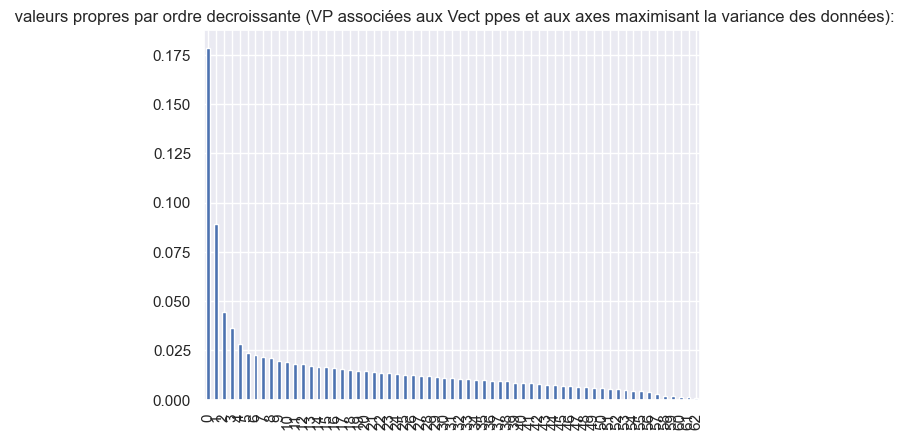

array([[ 1.02157828e+00,  1.31274719e+00, -1.02358273e+00, ...,
         2.38079037e-02,  2.74596246e-02, -2.90671691e-02],
       [-1.72252746e+00,  4.70974782e-01,  3.01624241e-02, ...,
        -1.02840643e-02, -4.31898811e-03,  2.88216891e-03],
       [ 3.17640222e+00,  1.48234564e+00,  7.46945730e-01, ...,
        -3.74544835e-01,  6.19788602e-02,  3.70873629e-02],
       ...,
       [ 1.31810104e+00, -3.08771475e-01,  1.50167102e-01, ...,
         3.55962654e-02,  4.58379679e-02, -1.95402642e-02],
       [ 2.70856490e+00,  5.83778894e-01,  6.68985026e-01, ...,
         1.85863954e-02, -3.37631068e-02,  3.11926943e-02],
       [-1.67585836e+00,  6.71778196e-01,  7.48264355e-01, ...,
        -1.24801463e-01,  3.63468271e-02, -3.45298740e-02]])

In [85]:
i_reduc=reduction_tools(meth_choice='pca',df_cible=df_train.drop(["id","prognosis"],axis=1),Y=df_train[["prognosis"]])
i_reduc.acp_biplot(axes=[0,1],biplot=True,l_label=["prognosis"],out_folder=path,bplot_name='prognosis',plot_var=True)

=============== affichage de a_X_pca ========================
[[ 1.02157828e+00  1.31274719e+00 -1.02358273e+00 ...  2.74596246e-02
  -2.90671691e-02  3.77214031e-04]
 [-1.72252746e+00  4.70974782e-01  3.01624241e-02 ... -4.31898811e-03
   2.88216891e-03 -9.55512983e-03]
 [ 3.17640222e+00  1.48234564e+00  7.46945730e-01 ...  6.19788602e-02
   3.70873629e-02  4.44872327e-02]
 ...
 [ 1.31810104e+00 -3.08771475e-01  1.50167102e-01 ...  4.58379679e-02
  -1.95402642e-02 -2.59558559e-02]
 [ 2.70856490e+00  5.83778894e-01  6.68985026e-01 ... -3.37631068e-02
   3.11926943e-02  7.65195814e-02]
 [-1.67585836e+00  6.71778196e-01  7.48264355e-01 ...  3.63468271e-02
  -3.45298740e-02  2.48457636e-02]]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.021578  1.312747 -1.023583  0.047943 -0.314889 -0.437293 -0.590393   
1 -1.722527  0.470975  0.030162 -0.093602  0.595433  0.403894 -0.819737   
2  3.176402  1.482346  0.746946 -0.574787 -1.127894  0.443843  0.639955   
3 

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

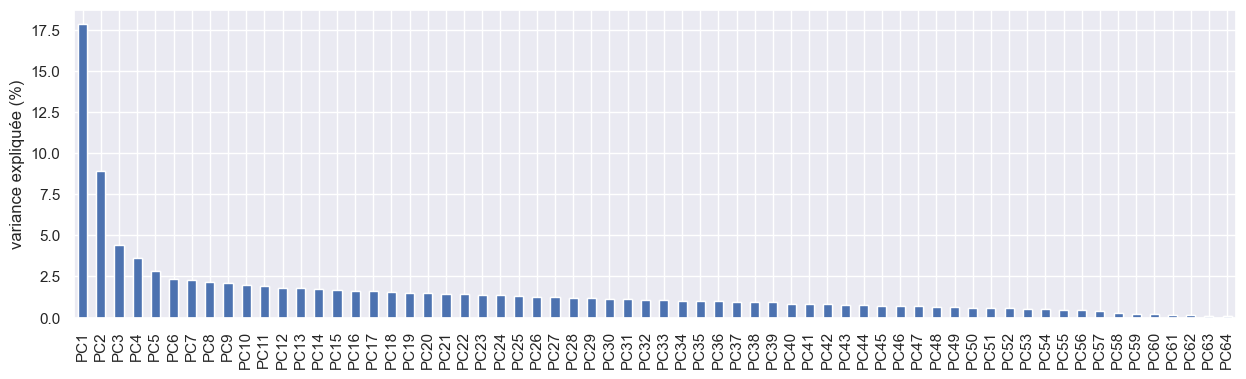

In [89]:
i_reduc.acp()
i_reduc.plot_acp_result(nb_comp=2,b_3d_plot=False)

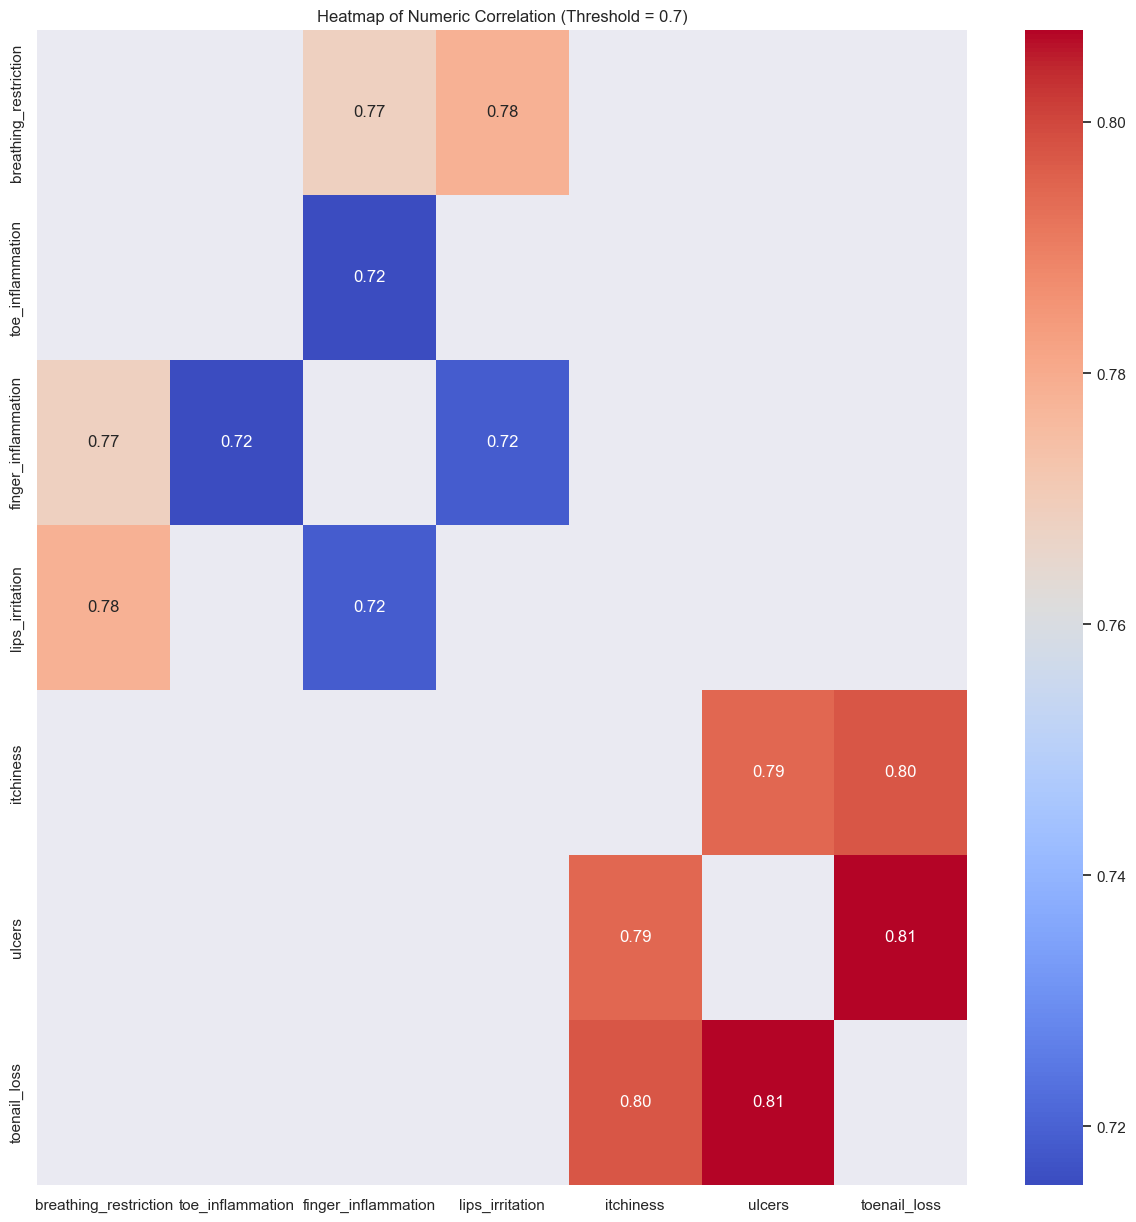

In [82]:

# Compute correlation coefficients
corr = df_correl

# Set threshold value
threshold = 0.7
df_corr_ = reduced_heatmap_corr(corr,threshold)
df_corr_.to_csv(os.path.join(path,"df_corr_.csv"),sep=";")


In [84]:
df_train_new = df_train.drop(["breathing_restriction","finger_inflammation","toe_inflammation","ulcers","itchiness"],axis=1)
df_test_new = df_test.drop(["breathing_restriction","finger_inflammation","toe_inflammation","ulcers","itchiness"],axis=1)

In [93]:
df_train_new.to_csv("df_train_new.csv",sep=";")
df_test_new.to_csv("df_test_new.csv",sep=";")

In [94]:
df_train[["prognosis"]].value_counts(normalize=True)

prognosis            
West_Nile_fever          0.120226
Japanese_encephalitis    0.114569
Rift_Valley_fever        0.099010
Tungiasis                0.099010
Chikungunya              0.093352
Dengue                   0.089109
Yellow_Fever             0.086280
Zika                     0.082037
Plague                   0.074965
Lyme_disease             0.073550
Malaria                  0.067893
dtype: float64